<a href="https://colab.research.google.com/github/aditi310896/Bulbdetection/blob/master/Multiclassmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Authentication and Setup 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Ncessary imports
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)

import os
import imageio # used for writing images
from random import shuffle
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import warnings
import random
warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
# a = []
# while(1):
#     a.append('1')

In [ ]:
 
# Mounting google drive; link google drive with colab
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Getting basic statistics about the training images
os.chdir("/content/drive/My Drive/Wavelength/Main data")
DIR = '/content/drive/My Drive/Wavelength/Main data'
train_data="/content/drive/My Drive/Wavelength/Main data"

In [ ]:
# train_data[1:10]

In [ ]:
# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

KeyboardInterrupt: ignored

In [ ]:
#os.listdir(train_data)

In [ ]:
batch_size=32
img_height=400
img_width=400
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files
#training data
generator_top = datagen.flow_from_directory(  
         train_data,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# # load the bottleneck features saved earlier  
# train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 6380 images belonging to 10 classes.


In [ ]:
channels = 3  #change to 1 if you want to use grayscale image
nrows = 400
ncolumns = 400
import cv2
#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in os.listdir():
        print(image)
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'MR16' in image:
            y.append('MR16')
        elif 'A19' in image:
            y.append('A19')
        elif'BR30' in image:
            y.append('BR3040')
        elif'BR40' in image:
            y.append('BR3040')
        elif'PAR20' in image:
            y.append('PAR2030')
        elif'PAR30' in image:
            y.append('PAR2030')
        elif'PAR38' in image:
            y.append('PAR38')  
        elif'R20' in image:
            y.append('R20')
        elif'T5' in image:
            y.append('T5T8')
        elif'T8' in image:
            y.append('T5T8')    
    return X, y

In [ ]:
X, y = read_and_process_image(train_data)


MR16


error: ignored

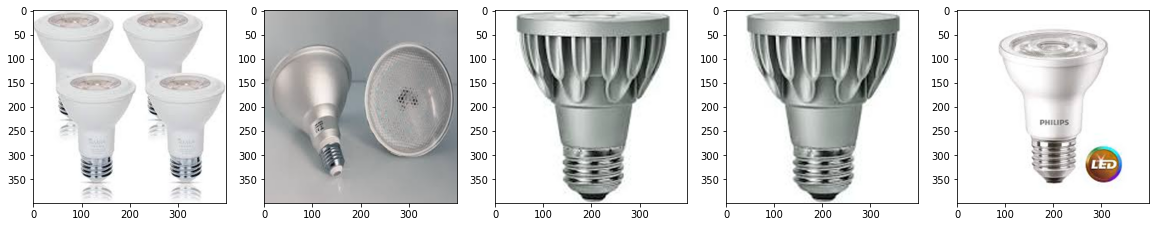

In [ ]:

#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])


Text(0.5, 1.0, 'Labels for different types')

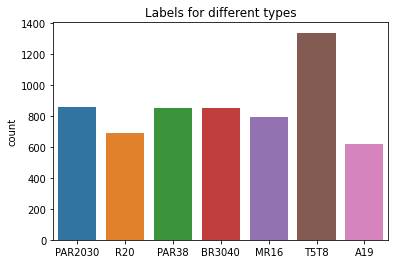

In [ ]:
import seaborn as sns
import gc
gc.collect()
#Convert list to numpy array
X = np.array(X)
y = np.array(y)
#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for different types')

In [ ]:

print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)


Shape of train images is: (6010, 400, 400, 3)
Shape of labels is: (6010,)


In [ ]:
num_classes=7
from keras.utils import np_utils # from keras import utils as np_utils
# convert the training labels to categorical vectors  
y_train = np_utils.to_categorical(y, num_classes)


ValueError: ignored

In [ ]:
#Lets split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of test images is:", X_test.shape)
print("Shape of trainlabels is:", y_train.shape)
print("Shape of testlabels is:", y_test.shape)

Shape of train images is: (5409, 400, 400, 3)
Shape of test images is: (601, 400, 400, 3)
Shape of trainlabels is: (5409,)
Shape of testlabels is: (601,)


In [ ]:

#Lets split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (4814, 400, 400, 3)
Shape of validation images is: (595, 400, 400, 3)
Shape of labels is: (4814,)
Shape of labels is: (595,)


In [ ]:
# #clear memory
# del X
# del y
# gc.collect()


#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
#batch_size = 1000

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

batch_size = 64
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(400, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(2048, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(1024, activation='relu'))#1024
model.add(layers.Dense(num_classes, activation='softmax'))  #Sigmoid function at the end because we have just two classes




In [ ]:
#Lets see our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 197, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 128)      

In [ ]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc']) #1e-4
#model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['acc'])

In [ ]:
# Setting up the Image Data Generator for Data Augmentation
# Included re-scaling, rotation, zooming and flipping of i mages
num_classes=7
from keras.utils import np_utils # from keras import utils as np_utils
# convert the training labels to categorical vectors  
y_train = np_utils.to_categorical(y_train, num_classes)
y_test=np_utils.to_categorical(y_test, num_classes)
y_val=np_utils.to_categorical(y_val, num_classes)
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
# train_labels = train_datagen.classes
# # convert the training labels to categorical vectors  
# train_labels = to_categorical(train_labels, num_classes=num_classes)
# Validation images only need to be re-scaled
val_datagen = ImageDataGenerator(rescale=1./255)

ValueError: ignored

In [ ]:
# Instantiating the generator objects test_X, test_y, train_X, train_y, valid_X, valid_y 
batch_size=16
train_generator = train_datagen.flow_from_dataframe(X_train, y_train, batch_size=batch_size,class_mode='categorical')
val_generator = val_datagen.flow_from_dataframe(X_val, y_val, batch_size=batch_size,class_mode='categorical')

ValueError: ignored

In [ ]:
os.chdir("/content/drive/My Drive/Wavelength/Data")

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

ValueError: ignored

In [ ]:
# Build the model; Run for 60 epochs, this number came by trial and error
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=100,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/100


ValueError: ignored

In [ ]:
#lets plot the train and val curve
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy for cnn ')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss for cnn')
plt.legend()

plt.show()

In [ ]:

# # Changing the driectory to the train images folder
os.chdir("/content/drive/My Drive/Wavelength")
# Save the trained model
model.save("multiclasscnn.h5")

In [ ]:
os.chdir("/content/drive/My Drive/Wavelength")


In [ ]:
# Load the saved model
from keras.models import load_model
saved_model = load_model('vggnetmodi.h5')

In [ ]:
# Visulalise Test data
testImages_vis = np.array([i[0] for i in X_val[0:10]])
testLabels_vis = np.array([i for i in y_val[0:10]])
x = np.array(testImages_vis)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Checking the accuracy of the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"The Accuracy on the test set is: {test_acc}")

In [ ]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(X,y, batch_size=1):
    pred = saved_model.predict(batch[0])
    if pred > 0.5:
        text_labels.append('MR16')
    else:
        text_labels.append('Other')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is ' + text_labels[i])
    imgplot = plt.imshow(batch[0][0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [ ]:
test_data= '/content/drive/My Drive/Wavelength/Test folder'